# Timing Demo

In [1]:
from time import time
time()

1454715226.7059486

In [2]:
_ // (365 * 24 * 60 * 60)

46.0

In [3]:
2016 - _

1970.0

i.e., `time.time()` returns seconds since Jan 1, 1970. (Essentially arbitrary.)

In [4]:
start = time() # start timestamp
sum(range(10**6))
end = time() # end timestamp
print('Elapsed =', (end-start), 'seconds')

Elapsed = 0.011022329330444336 seconds


In [5]:
print('Elapsed =', (end-start)*1000, 'milliseconds')

Elapsed = 11.022329330444336 milliseconds


In [6]:
def time_this(fn):
    start = time() # start timestamp
    fn()
    end = time() # end timestamp
    return end - start

In [7]:
time_this(lambda: sum(range(10**6)))

0.01095724105834961

In [8]:
[time_this(lambda: sum(range(10**6))) for _ in range(10)]

[0.011017799377441406,
 0.010881423950195312,
 0.011013031005859375,
 0.01097416877746582,
 0.010960817337036133,
 0.010851621627807617,
 0.010904312133789062,
 0.010797500610351562,
 0.010797500610351562,
 0.010843276977539062]

In [9]:
%time sum(range(10**6))

CPU times: user 10.8 ms, sys: 187 µs, total: 11 ms
Wall time: 11 ms


499999500000

In [10]:
%timeit sum(range(10**6))

100 loops, best of 3: 10.8 ms per loop


## Comparison: list vs. dict search

In [11]:
lst = [(x, x*2) for x in range(10**6)]

In [12]:
def find(lst, key):
    for x in lst:
        if key == x[0]:
            return x[1]
    else:
        return None

In [13]:
find(lst, 50)

100

In [14]:
import random
random.randrange(10**6)

298320

In [15]:
%timeit find(lst, random.randrange(10**6))

10 loops, best of 3: 15.2 ms per loop


In [16]:
dct = {x: x*2 for x in range(10**6)}

In [17]:
dct[50]

100

In [18]:
%timeit dct[random.randrange(10**6)]

The slowest run took 8.29 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 689 ns per loop


In [19]:
import timeit

In [20]:
timeit.timeit('find(lst, random.randrange(10**6))', 
              'import random ; '
              'from __main__ import find ; ' # need to import find function from this file
              'lst = [(x, x*2) for x in range(10**6)]',
             number=100)

1.5856815199949779

In [21]:
timeit.timeit('dct[random.randrange(10**6)]', 
              'import random ; '
              'dct = {x: x*2 for x in range(10**6)}',
             number=100)

8.550399797968566e-05

In [22]:
def time_list(size):
    return timeit.timeit('find(lst, random.randrange({}))'.format(size), # interpolate size into randrange
                         'import random ; '
                         'from __main__ import find ; '
                         'lst = [(x, x*2) for x in range({})]'.format(size), # interpolate size into list range
                         number=100)

In [23]:
# digression, e.g., string interpolation
print('hello {}, how are you?'.format('Michael'))
print('{}, meet {}'.format('Mary', 'John'))
print('{}, {}, {}'.format(1, 'apple', True))
for t in ((5, '=', 5), (100, '=/=', 1234)):
    print('{:_>5}{:^5}{:_<5}'.format(*t))

hello Michael, how are you?
Mary, meet John
1, apple, True
____5  =  5____
__100 =/= 1234_


In [24]:
list_timings = [time_list(n)
                for n in range(10, 10000, 100)]

In [25]:
list_timings[:10]

[8.965899178292602e-05,
 0.0002707209932850674,
 0.00039296899922192097,
 0.0005689050012733787,
 0.0007557579956483096,
 0.0008692569972481579,
 0.0012122710031690076,
 0.0011502790002850816,
 0.0012096340069547296,
 0.0015459599962923676]

In [26]:
def time_dict(size):
    return timeit.timeit('dct[random.randrange({})]'.format(size), 
                         'import random ; '
                         'dct = {{x: x*2 for x in range({})}}'.format(size),
                         number=100)

In [27]:
dict_timings = [time_dict(n)
                for n in range(10, 10000, 100)]

In [28]:
dict_timings[:10]

[5.7735000154934824e-05,
 5.2265997510403395e-05,
 5.337499896995723e-05,
 5.732900172006339e-05,
 5.553000664804131e-05,
 5.286899977363646e-05,
 5.916600639466196e-05,
 6.22609950369224e-05,
 6.101200415287167e-05,
 5.754800804425031e-05]

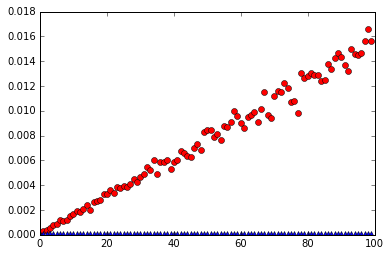

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list_timings, 'ro')
plt.plot(dict_timings, 'b^')
plt.show()